In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('reliancetest.csv',index_col=[0])

In [4]:
df

,Open,High,Low,Close,ST,SMA,EMA,RSI,MACtab,MACsig
Time,,,,,,,,,,
2022-05-30 12:00:00,2642.85,2644.85,2642.15,2644.55,2649.199439,2648.125,2643.811132,59.043996,6.968465,8.573152
2022-05-30 12:05:00,2644.80,2644.85,2640.10,2643.05,2648.038805,2647.480,2643.709648,57.335232,6.361663,8.130854
2022-05-30 12:10:00,2643.10,2648.55,2643.10,2644.50,2648.038805,2646.985,2643.815028,58.583035,5.929420,7.690568
2022-05-30 12:15:00,2644.50,2644.50,2640.00,2642.50,2647.654020,2646.810,2643.639691,56.143953,5.363653,7.225185
2022-05-30 12:20:00,2642.50,2648.00,2640.40,2647.80,2640.270310,2645.780,2644.194399,60.801475,5.282055,6.836559
...,...,...,...,...,...,...,...,...,...,...
2022-09-05 15:05:00,2573.90,2575.00,2569.05,2571.00,2567.502941,2572.610,2571.886843,49.717466,0.587919,1.138776
2022-09-05 15:10:00,2571.10,2573.85,2570.15,2571.00,2567.595378,2572.110,2571.768598,49.717466,0.476199,1.006260
2022-09-05 15:15:00,2571.00,2571.65,2566.95,2570.00,2567.595378,2572.010,2571.532785,47.941474,0.303470,0.865702


<AxesSubplot:xlabel='Time'>

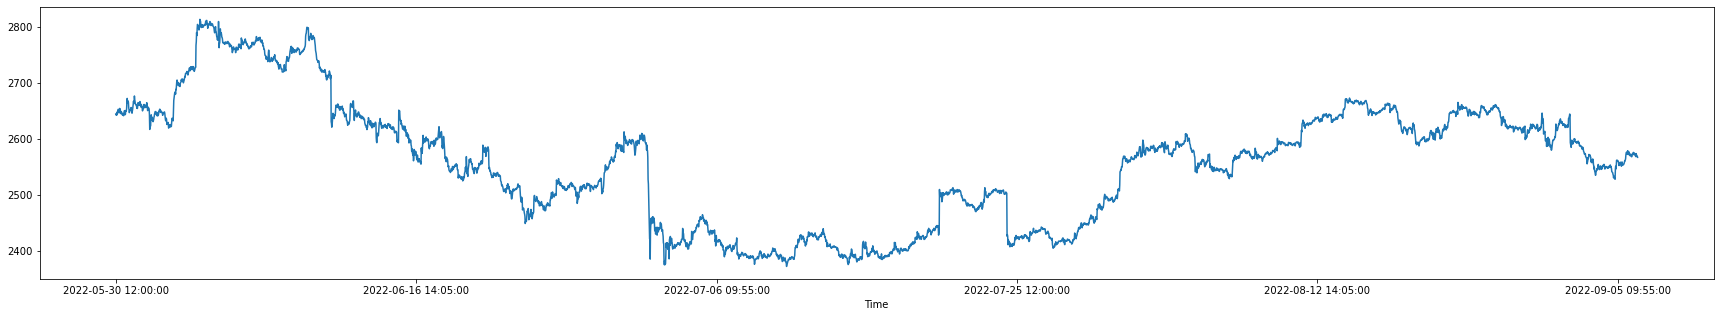

In [6]:
df.Close.plot(figsize=(30,5))

In [9]:
df['log_returns'] = np.log(df['Close'].pct_change() + 1)*100
df = df.dropna()

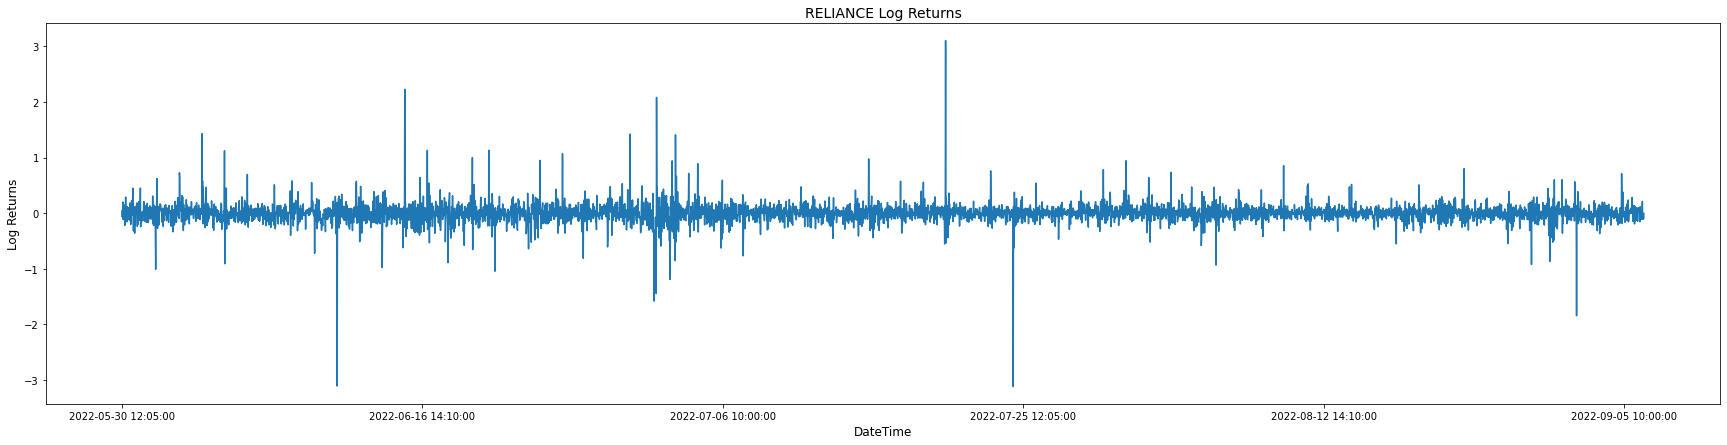

In [11]:
df['log_returns'].plot(figsize=(30, 7))
# Set title and labels for the plot
plt.title('RELIANCE Log Returns', fontsize=14)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('Log Returns', fontsize=12)

plt.show()

In [12]:
df['actual_historical_volatility'] = df['log_returns'].rolling(14).std() * ((252)**0.5)

# Print the last 5 rows
df.round(2).tail()

/var/folders/zd/x00f3z_d40zgsgh0nf_fpjmm0000gn/T/ipykernel_28763/3783125084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_historical_volatility'] = df['log_returns'].rolling(14).std() * ((252)**0.5)


,Open,High,Low,Close,ST,SMA,EMA,RSI,MACtab,MACsig,log_returns,actual_historical_volatility
Time,,,,,,,,,,,,
2022-09-05 15:05:00,2573.9,2575.00,2569.05,2571.0,2567.50,2572.61,2571.89,49.72,0.59,1.14,-0.11,1.60
2022-09-05 15:10:00,2571.1,2573.85,2570.15,2571.0,2567.60,2572.11,2571.77,49.72,0.48,1.01,0.00,1.57
2022-09-05 15:15:00,2571.0,2571.65,2566.95,2570.0,2567.60,2572.01,2571.53,47.94,0.30,0.87,-0.04,1.57
2022-09-05 15:20:00,2570.0,2571.00,2566.90,2567.4,2573.35,2571.51,2570.98,43.58,-0.04,0.68,-0.10,1.60
2022-09-05 15:25:00,2567.4,2569.40,2566.90,2567.2,2572.28,2570.79,2570.48,43.26,-0.33,0.48,-0.01,1.56


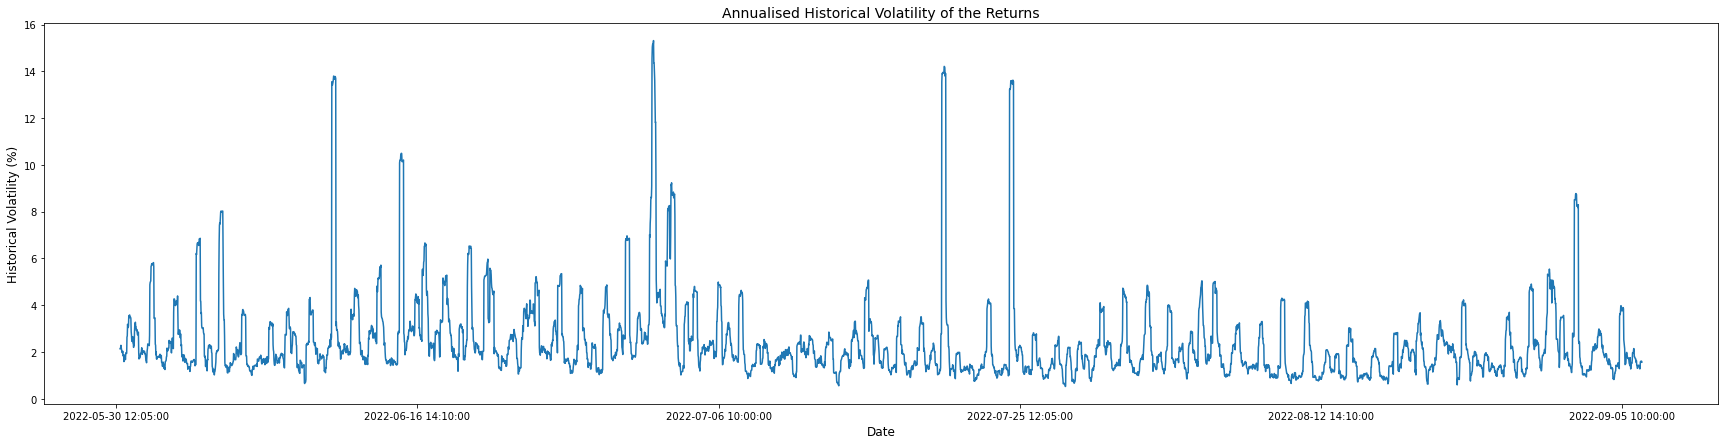

In [16]:
df['actual_historical_volatility'].plot(figsize=(30, 7))
# Set title and labels for the plot
plt.title('Annualised Historical Volatility of the Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Historical Volatility (%)', fontsize=12)
plt.show()

In [22]:
import warnings
warnings.filterwarnings('ignore')
from arch import arch_model
# Function to predict the volatility of 1 day
def predict_volatility(hist_returns_data):
    # Define model
    gm = arch_model(hist_returns_data, vol='ARCH', p=1, dist='skewt')

    # Fit the model
    gm_fit = gm.fit(disp='off') 
    
    # Make forecast
    forecasted_variance = gm_fit.forecast(horizon=1).variance.values[-1]

    # Forecasted volatility
    forecasted_volatility = forecasted_variance**0.5

    # Calculate and return the annualised forecasted variance
    annualised_volatility = forecasted_volatility * (252**0.5)
    return annualised_volatility

# Calculate the ARCH predicted volatility for the each day    
df['ARCH_predicted_volatility'] = df['log_returns'].rolling(252).apply(predict_volatility, raw=True)

# Shift the ARCH predicted volatility to match with the actual historical volatility on each day    
df['ARCH_predicted_volatility'] = df['ARCH_predicted_volatility'].shift(1)

In [23]:
# Showing an example of the normal market scenario
df[['log_returns','ARCH_predicted_volatility', 'actual_historical_volatility']].dropna()[30:35].round(2)

,log_returns,ARCH_predicted_volatility,actual_historical_volatility
Time,,,
2022-06-03 10:35:00,-0.17,2.81,3.64
2022-06-03 10:40:00,-0.22,3.12,3.68
2022-06-03 10:45:00,-0.02,3.36,3.12
2022-06-03 10:50:00,0.18,2.82,3.02
2022-06-03 10:55:00,0.00,3.08,3.01


In [24]:
# Showing an example of the adverse market scenario
df[['log_returns','ARCH_predicted_volatility', 'actual_historical_volatility']].dropna()[40:45].round(2)

,log_returns,ARCH_predicted_volatility,actual_historical_volatility
Time,,,
2022-06-03 11:25:00,0.02,2.79,2.76
2022-06-03 11:30:00,0.03,2.74,1.81
2022-06-03 11:35:00,-0.03,2.73,1.78
2022-06-03 11:40:00,0.07,2.69,1.82
2022-06-03 11:45:00,-0.01,2.73,1.69
